# Imports

In [1]:
import keras
import tensorflow as tf
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

In [3]:
from IPython.core.display import  display
from keras.preprocessing.image import array_to_img, load_img

In [4]:
x_train.shape

(50000, 32, 32, 3)

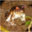

In [5]:
array_to_img(x_train[0])

# constants

In [6]:
LABELS = ['airplane','automobile' , 'bird','cat','deer','dog','frog','horse','ship','truck']
height = 32
width = 32
pixels = height * width
channels = 3
total_pix = pixels * channels
validation = 10000

# Sample plots

In [7]:

for i in range(10):
    
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(LABELS[y_train[i][0]], fontsize=14)
    plt.figure(figsize=(10,8))

# Dimensions of Data set

In [8]:
num , x,y,c = x_train.shape

In [9]:
print(f'images :{num}\t| width :{x}\t| height :{y}\t| channels: {c}')

images :50000	| width :32	| height :32	| channels: 3


In [10]:
num , x,y,c = x_test.shape

In [11]:
print(f'images :{num}\t| width :{x}\t| height :{y}\t| channels: {c}')

images :10000	| width :32	| height :32	| channels: 3


# Dimension reduction

In [12]:
x_train , x_test = x_train/255.0 , x_test/255.0

In [13]:
x_train.shape[0]

50000

In [14]:
x_train = x_train.reshape(x_train.shape[0],total_pix)

In [15]:
x_train.shape

(50000, 3072)

In [16]:
x_test = x_test.reshape(x_test.shape[0],total_pix)

In [17]:
x_test.shape

(10000, 3072)

# Splitting into Validation and train sets

In [18]:
x_val = x_train[:validation]
y_val = y_train[:validation]
x_val.shape

(10000, 3072)

In [19]:
x_train = x_train[validation:]
y_train = y_train[validation:]
x_train.shape , y_train.shape

((40000, 3072), (40000, 1))

# Sample dataset to test

In [20]:
x_train_s = x_train[:1000]
y_train_s = y_train[:1000]
x_train.shape

(40000, 3072)

In [21]:
x_train_s.shape

(1000, 3072)

In [28]:
import os
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import TensorBoard
from time import strftime


# Define Neural network for keras 

In [33]:
model_1 = Sequential([
    Dense(units =128 , input_dim = total_pix , activation = 'relu' , name = 'm1_hidden1'),
    Dense(units = 64 , activation = 'relu' , name = 'm1_hidden2'),
    Dense(units = 16 , activation = 'relu' , name = 'm1_hidden3'),
    Dense(units = 10 , activation = 'softmax' , name = 'm1_output')
])


model_1.compile(optimizer = 'adam' , 
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

In [34]:
model_2 = Sequential()
model_2.add(Dropout(.2, seed = 42, input_shape = (total_pix,)))
model_2.add(Dense (128 , activation = 'relu', name = 'm2_hidden1'))
model_2.add(Dense (64 , activation = 'relu', name = 'm2_hidden2'))
model_2.add(Dense (16 , activation = 'relu', name = 'm2_hidde3'))
model_2.add(Dense (10 , activation = 'softmax', name = 'm2_output'))

model_2.compile(optimizer = 'adam' , 
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

In [35]:
model_3 = Sequential()
model_3.add(Dropout(.2, seed = 42, input_shape = (total_pix,)))
model_3.add(Dense (128 , activation = 'relu', name = 'm3_hidden1'))
model_3.add(Dropout(.25, seed = 42))
model_3.add(Dense (64 , activation = 'relu', name = 'm3_hidden2'))
model_3.add(Dense (16 , activation = 'relu', name = 'm3_hidde3'))
model_3.add(Dense (10 , activation = 'softmax', name = 'm3_output'))

model_3.compile(optimizer = 'adam' , 
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

In [36]:
type(model_1)

keras.engine.sequential.Sequential

In [37]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [38]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_3 (Dropout)          (None, 3072)              0         
_________________________________________________________________
m2_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m2_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m2_hidde3 (Dense)            (None, 16)                1040      
_________________________________________________________________
m2_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [39]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_4 (Dropout)          (None, 3072)              0         
_________________________________________________________________
m3_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
m3_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m3_hidde3 (Dense)            (None, 16)                1040      
_________________________________________________________________
m3_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
________________________________________________

model_1.summary()

In [25]:
def get_tensorboard(model_name):
    dir_path = os.path.join(r"C:\Users\SARVESH\Documents\GitHub\Machine learning course",'first')
    
    try:
        os.makedirs(dir_path)
    except OSError as err:
        print(err.strerror)
    else:
        print('Sucessfully created directory')
    return TensorBoard(log_dir = dir_path)

# Fit the model

In [26]:
%%time
model_1.fit(x_train_s,y_train_s ,batch_size=1000, epochs=200,validation_data=(x_val,y_val),
            callbacks=[get_tensorboard(model_1)])

Cannot create a file when that file already exists
Train on 1000 samples, validate on 10000 samples
Epoch 1/200
1000/1000 [==============================] - 3s 3ms/step - loss: 2.3252 - accuracy: 0.0840 - val_loss: 2.3488 - val_accuracy: 0.1168
Epoch 2/200


C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.629631). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 1ms/step - loss: 2.3246 - accuracy: 0.1430 - val_loss: 2.3529 - val_accuracy: 0.1081
Epoch 3/200
1000/1000 [==============================] - 1s 625us/step - loss: 2.3302 - accuracy: 0.1090 - val_loss: 2.2696 - val_accuracy: 0.1499
Epoch 4/200
1000/1000 [==============================] - 1s 651us/step - loss: 2.2556 - accuracy: 0.1720 - val_loss: 2.2540 - val_accuracy: 0.1641
Epoch 5/200
1000/1000 [==============================] - 1s 704us/step - loss: 2.2379 - accuracy: 0.1960 - val_loss: 2.2374 - val_accuracy: 0.1576
Epoch 6/200
1000/1000 [==============================] - 1s 652us/step - loss: 2.2123 - accuracy: 0.1950 - val_loss: 2.2163 - val_accuracy: 0.1728
Epoch 7/200
1000/1000 [==============================] - 1s 670us/step - loss: 2.1846 - accuracy: 0.2030 - val_loss: 2.2181 - val_accuracy: 0.1795
Epoch 8/200
1000/1000 [==============================] - 1s 640us/step - loss: 2.1845 - accuracy: 0.1990 - val_loss: 2.1977 - val_ac

In [32]:
%%time
model_2.fit(x_train_s,y_train_s ,batch_size=1000, epochs=150,validation_data=(x_val,y_val),
            callbacks=[get_tensorboard(model_2)])

Cannot create a file when that file already exists
Train on 1000 samples, validate on 10000 samples
Epoch 1/150
1000/1000 [==============================] - 1s 1ms/step - loss: 2.3668 - accuracy: 0.0950 - val_loss: 2.3835 - val_accuracy: 0.1037
Epoch 2/150


C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.115909). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 501us/step - loss: 2.3994 - accuracy: 0.1120 - val_loss: 2.3979 - val_accuracy: 0.1099
Epoch 3/150
1000/1000 [==============================] - 0s 401us/step - loss: 2.4112 - accuracy: 0.1050 - val_loss: 2.3330 - val_accuracy: 0.1170
Epoch 4/150
1000/1000 [==============================] - 0s 379us/step - loss: 2.3357 - accuracy: 0.1300 - val_loss: 2.3252 - val_accuracy: 0.1017
Epoch 5/150
1000/1000 [==============================] - 0s 391us/step - loss: 2.3181 - accuracy: 0.1180 - val_loss: 2.3335 - val_accuracy: 0.1001
Epoch 6/150
1000/1000 [==============================] - 0s 370us/step - loss: 2.3167 - accuracy: 0.1180 - val_loss: 2.3068 - val_accuracy: 0.1005
Epoch 7/150
1000/1000 [==============================] - 0s 392us/step - loss: 2.2919 - accuracy: 0.1200 - val_loss: 2.2822 - val_accuracy: 0.1003
Epoch 8/150
1000/1000 [==============================] - 0s 401us/step - loss: 2.2756 - accuracy: 0.1190 - val_loss: 2.2771 - val_

# Train the model on Actual Train Data

In [40]:
%%time
model_1.fit(x_train,y_train ,batch_size=1000, epochs=100,validation_data=(x_val,y_val),
            callbacks=[get_tensorboard(model_1)])

Cannot create a file when that file already exists
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 5s 124us/step - loss: 2.2783 - accuracy: 0.1147 - val_loss: 2.2387 - val_accuracy: 0.1148
Epoch 2/100
40000/40000 [==============================] - 2s 53us/step - loss: 2.1816 - accuracy: 0.1822 - val_loss: 2.1102 - val_accuracy: 0.2198
Epoch 3/100
40000/40000 [==============================] - 2s 56us/step - loss: 2.0533 - accuracy: 0.2391 - val_loss: 1.9881 - val_accuracy: 0.2895
Epoch 4/100
40000/40000 [==============================] - 2s 55us/step - loss: 1.9532 - accuracy: 0.2987 - val_loss: 1.9036 - val_accuracy: 0.3144
Epoch 5/100
40000/40000 [==============================] - 2s 59us/step - loss: 1.8686 - accuracy: 0.3331 - val_loss: 1.8363 - val_accuracy: 0.3468
Epoch 6/100
40000/40000 [==============================] - 2s 54us/step - loss: 1.8179 - accuracy: 0.3488 - val_loss: 1.7800 - val_accuracy: 0.3660
Epoch 7/10

In [41]:
%%time
model_2.fit(x_train,y_train ,batch_size=1000, epochs=100,validation_data=(x_val,y_val),
            callbacks=[get_tensorboard(model_2)])

Cannot create a file when that file already exists
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 4s 100us/step - loss: 2.2345 - accuracy: 0.1434 - val_loss: 2.1936 - val_accuracy: 0.1565
Epoch 2/100
40000/40000 [==============================] - 4s 104us/step - loss: 2.1751 - accuracy: 0.1612 - val_loss: 2.1603 - val_accuracy: 0.1654
Epoch 3/100
40000/40000 [==============================] - 4s 106us/step - loss: 2.1465 - accuracy: 0.1752 - val_loss: 2.1403 - val_accuracy: 0.1975
Epoch 4/100
40000/40000 [==============================] - 5s 117us/step - loss: 2.1081 - accuracy: 0.2108 - val_loss: 2.0802 - val_accuracy: 0.2277
Epoch 5/100
40000/40000 [==============================] - 4s 107us/step - loss: 2.0540 - accuracy: 0.2255 - val_loss: 2.0516 - val_accuracy: 0.2250
Epoch 6/100
40000/40000 [==============================] - 4s 109us/step - loss: 1.9982 - accuracy: 0.2476 - val_loss: 1.9623 - val_accuracy: 0.2732
Epoch

In [ ]:
#%%time
#model_3.fit(x_train,y_train ,batch_size=1000, epochs=150,validation_data=(x_val,y_val),
 #           callbacks=[get_tensorboard(model_2)]

In [43]:
x_val[0].shape

(3072,)

In [44]:
test = np.expand_dims(x_val[0],axis = 0)

In [45]:
test.shape

(1, 3072)

In [47]:
np.set_printoptions(precision = 3)

In [48]:
model_2.predict(test)

array([[4.622e-02, 9.229e-04, 7.853e-02, 7.560e-02, 1.445e-01, 1.200e-01,
        4.293e-01, 1.039e-01, 1.433e-04, 8.036e-04]], dtype=float32)

In [49]:
model_2.predict_classes(test)

array([6], dtype=int64)

In [50]:
y_val[0]

array([6], dtype=uint8)

In [53]:
predict = model_2.predict_classes(x_val[:10])

In [55]:
predict

array([6, 1, 9, 6, 8, 7, 2, 7, 8, 9], dtype=int64)

In [57]:
act = y_val[:10]

In [65]:
correct = 0
incorrect = 0
for i in range(10):
    print('Actual value: {} Predicted Value: {}'.format(act[i],predict[i]))
        

Actual value: [6] Predicted Value: 6
Actual value: [9] Predicted Value: 1
Actual value: [9] Predicted Value: 9
Actual value: [4] Predicted Value: 6
Actual value: [1] Predicted Value: 8
Actual value: [1] Predicted Value: 7
Actual value: [2] Predicted Value: 2
Actual value: [7] Predicted Value: 7
Actual value: [8] Predicted Value: 8
Actual value: [3] Predicted Value: 9


In [66]:
model_2.metrics_names

['loss', 'accuracy']

In [69]:
test_loss , test_accuracy = model_2.evaluate(x_test,y_test)
print(f'Test loss :{test_loss:0.3} and Test accuracy{test_accuracy:0.1%}')

10000/10000 [==============================] - 0s 45us/step
Test loss :1.4 and Test accuracy50.5%


In [70]:
predictions = model_2.predict_classes(x_test)

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
conf_met = confusion_matrix(y_true=y_test, y_pred=predictions)

In [74]:
conf_met.shape

(10, 10)

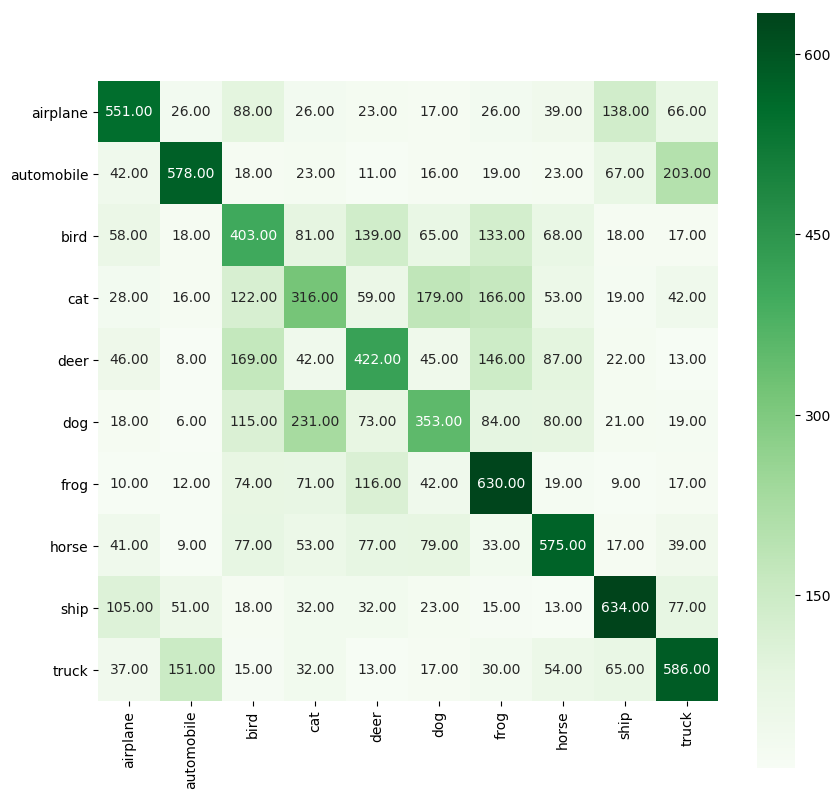

In [83]:
plt.figure(figsize = (10,10),dpi =100)
sns.heatmap(conf_met, cbar = True , annot = True, square = True, fmt = '.2f',cmap = 'Greens',
            xticklabels=LABELS,yticklabels = LABELS)

# Recall = TP/(TP+FN)


# Precision = TP/(TP+FP)

In [84]:
#Recall
recall = np.diag(conf_met)/np.sum(conf_met,axis= 1)
recall

array([0.551, 0.578, 0.403, 0.316, 0.422, 0.353, 0.63 , 0.575, 0.634,
       0.586])

In [85]:
#Precision
precision = np.diag(conf_met)/np.sum(conf_met,axis = 0)
precision

array([0.589, 0.661, 0.367, 0.348, 0.437, 0.422, 0.491, 0.569, 0.628,
       0.543])

In [88]:
avg_recall = np.mean(recall)
avg_precision = np.mean(precision)
print(f'Recall of the model: {avg_recall:.2%}')
print(f'Precision of the model: {avg_precision:.2%}')

Recall of the model: 50.48%
Precision of the model: 50.55%


# F-score = 2 * (Precision * Recall)/(Precision + Recall)

In [91]:
f_score = 2 * ((avg_precision*avg_recall)/(avg_precision+avg_recall))
print(f'The F-score: {f_score:.2%}')

The F-score: 50.51%
